# Analyse avec pyplot

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_table('heart.txt')
df.copy()
df.head()


,age,sexe,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,58,masculin,100.0,234.0,A,A,156,non,1,1,B,presence
1,41,feminin,NaN,204.0,A,C,172,non,14,1,A,absence
2,58,masculin,150.0,270.0,A,C,111,oui,8,1,A,presence
3,53,masculin,140.0,203.0,B,C,155,oui,31,3,A,presence
4,41,masculin,130.0,214.0,A,C,168,non,20,2,A,absence


In [3]:
df.isna().sum()

age           0
sexe          0
pression      2
cholester     1
sucre         0
electro       0
taux_max      0
angine        3
depression    0
pic           0
vaisseau      0
coeur         0
dtype: int64

In [5]:
df_coeur = df.groupby("coeur").size()
df_coeur

coeur
absence     150
presence    120
dtype: int64

<AxesSubplot:xlabel='age', ylabel='pression'>

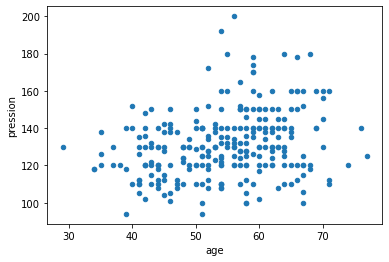

In [30]:
df.plot.scatter(x = 'age', y = 'pression')

<AxesSubplot:xlabel='age', ylabel='cholester'>

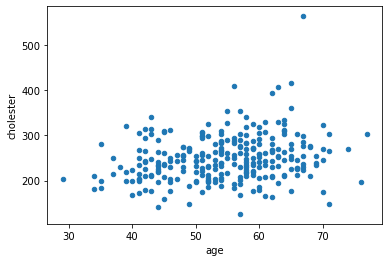

In [32]:
df.plot.scatter(x = 'age', y = 'cholester')

<AxesSubplot:xlabel='pression', ylabel='cholester'>

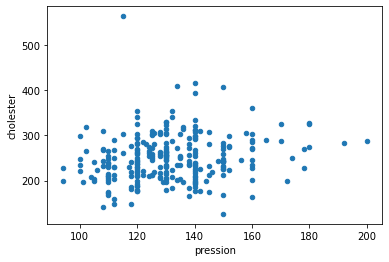

In [34]:
df.plot.scatter( x = 'pression', y = 'cholester')

<AxesSubplot:xlabel='pression', ylabel='taux_max'>

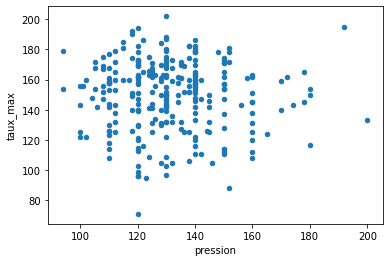

In [36]:
df.plot.scatter( x = 'pression', y = 'taux_max')

<AxesSubplot:xlabel='pression', ylabel='depression'>

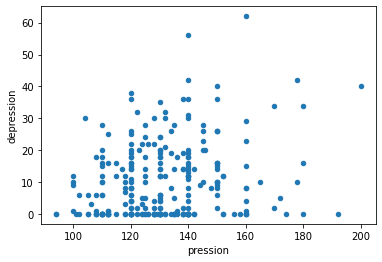

In [38]:
df.plot.scatter(x = 'pression', y = 'depression')

<AxesSubplot:xlabel='cholester', ylabel='pic'>

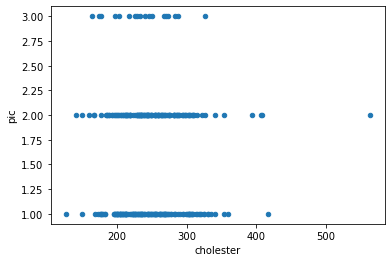

In [39]:
df.plot.scatter( x = 'cholester', y = 'pic')

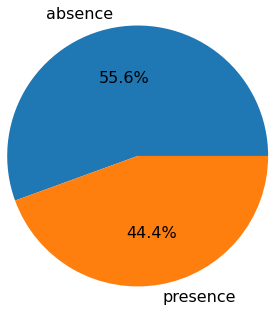

In [6]:
plt.pie(df_coeur.values, labels = ["absence", "presence"], autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.show()

plus de la moitié des personne diagnostiquées dans notre jeu de données ont la maladie du coeur

In [7]:
df_sexe = df.groupby(["sexe","coeur"]).size()
df_sexe

sexe      coeur   
feminin   absence      67
          presence     20
masculin  absence      83
          presence    100
dtype: int64

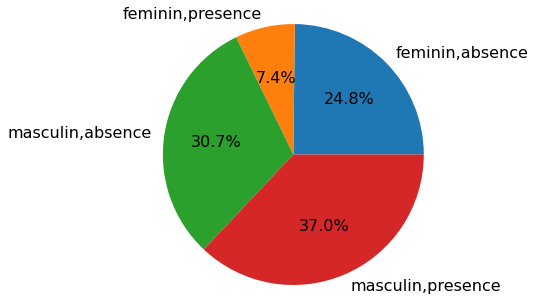

In [8]:
plt.pie(df_sexe.values, labels = ["feminin,absence", "feminin,presence", "masculin,absence", "masculin,presence"],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()  


Le ratio des hommes qui ont mal au coeur est de 37.0%, environ 5 fois celui des femmes.

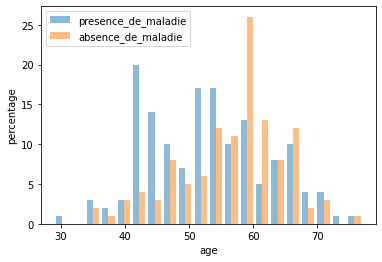

In [10]:
plt.hist([df[df.coeur=='absence'].age, df[df.coeur=='presence'].age], bins = 20, alpha = 0.5, label = ["presence_de_maladie","absence_de_maladie"])
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend()
plt.show()


On observe une majorité de personnes atteintes au coeur entre 40 et 70 ans

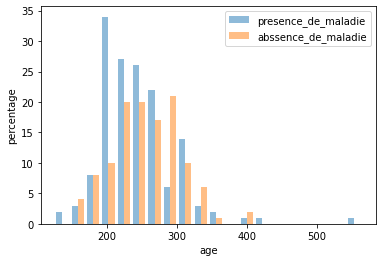

In [11]:
plt.hist([df[df.coeur=='absence'].cholester, df[df.coeur=='presence'].cholester], bins = 20, alpha = 0.5, label = ["presence_de_maladie","abssence_de_maladie"])
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend()
plt.show()

Aussi les personnes qui ont un cholester compri entre 200 et 300 sont les plus toucher par la maladie

# Application de la regression logistique

In [13]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_table('heart.txt')
df.copy()
df.head()

,age,sexe,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,58,masculin,100.0,234.0,A,A,156,non,1,1,B,presence
1,41,feminin,NaN,204.0,A,C,172,non,14,1,A,absence
2,58,masculin,150.0,270.0,A,C,111,oui,8,1,A,presence
3,53,masculin,140.0,203.0,B,C,155,oui,31,3,A,presence
4,41,masculin,130.0,214.0,A,C,168,non,20,2,A,absence


In [15]:
X = df['age']
y = df['coeur']

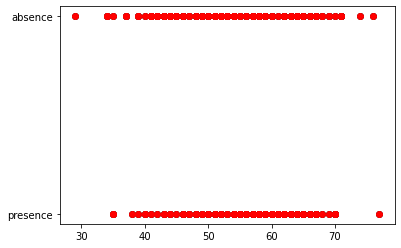

In [16]:
plt.plot(X, y, 'bo', color="black")
plt.plot(X, y, 'bo', color='red')
plt.show()

In [17]:
def sigmoid(t):
    return 1/(1 + np.e**-t)

range_vals = np.linspace(-10, 10, 50)

sigmoid_values = sigmoid(range_vals)

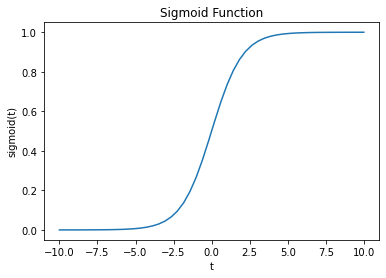

In [18]:
plt.plot(range_vals, sigmoid_values)
plt.title("Sigmoid Function")
plt.xlabel("t")
plt.ylabel("sigmoid(t)")
plt.show()

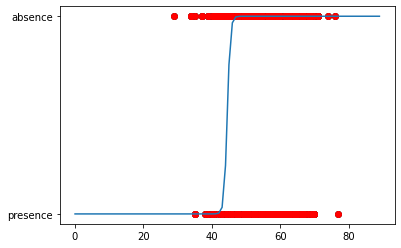

In [19]:
sig_log_vals = sigmoid(np.linspace(-100, 100, 90))
plt.plot(X, y, 'bo', color="black")
plt.plot(X, y, 'bo', color="red")
plt.plot(sig_log_vals)
plt.show()

In [20]:
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

In [21]:
from sklearn.linear_model import LogisticRegression

logit_reg = LogisticRegression().fit(X, y.ravel())

In [22]:
logit_reg.coef_

array([[0.04900704]])

In [23]:
logit_reg.intercept_

array([-2.90257146])

In [24]:
print(logit_reg.predict([[40]]))
print(logit_reg.predict([[56]]))

['absence']
['absence']


In [25]:
y_pred = logit_reg.predict(X)

# application du Bagging